In [3]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [4]:
#loading data file
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

#display top of dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:

#Display the shape of dataset 
data.shape
print('The data set has ',data.shape[0],'rows and ',data.shape[1],'columns.')

The data set has  614 rows and  13 columns.


In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
## Checking for null values in dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

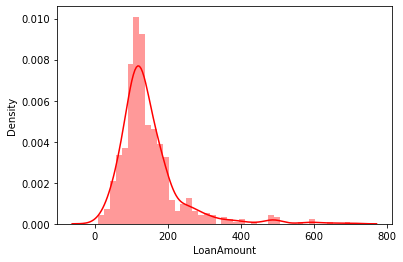

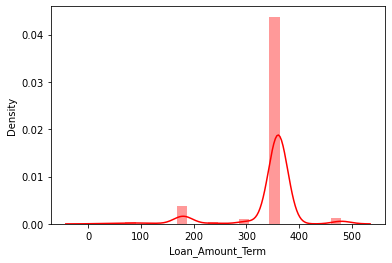

<Figure size 432x288 with 0 Axes>

In [8]:
cols=['LoanAmount','Loan_Amount_Term']
for i in cols:
    sns.distplot(data[i],color='r')
    plt.figure()

In [9]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [10]:
print('Unique values for attributes of dataset:\n')
data.apply(lambda x: len(x.unique()))

Unique values for attributes of dataset:



Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:

## Statistical Summary
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049
std,6109.041673,2926.248369,84.107233,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

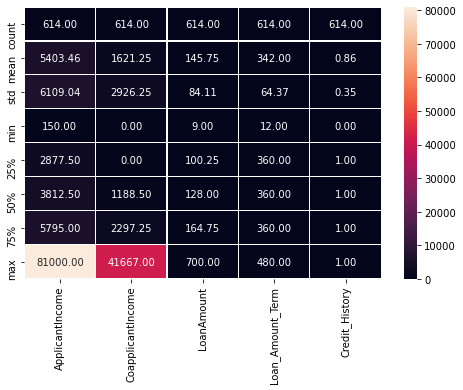

In [12]:
#Visualization of describe function

plt.figure(figsize=(8,5))
sns.heatmap(data.describe(),annot=True,linecolor='white',fmt='.2f',linewidths=0.1)

####  Exploratory data analysis for Nominal/catagorical type of data.

Male      502
Female    112
Name: Gender, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
-------------------------------------------------------------------------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-------------------------------------------------------------------------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
-------------------------------------------------------------------------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
---------------------------------

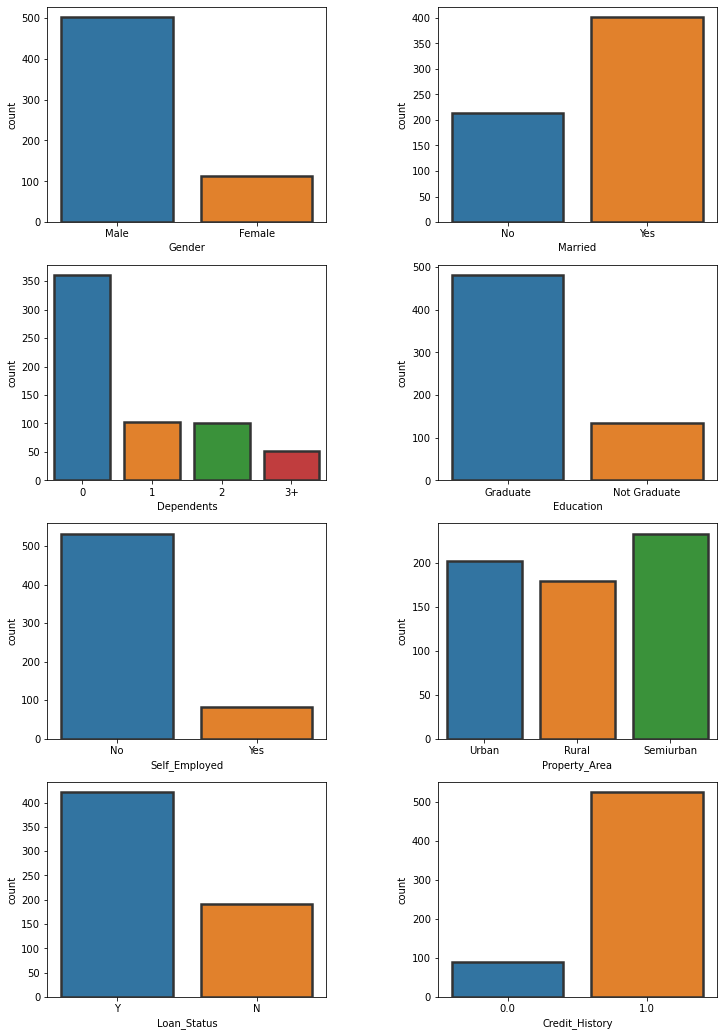

In [13]:
# Nominal/Catagorical data:['Gender', 'Married', 'Dependents', 'Education', 
#                           'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
plt.figure(figsize=(12,10))    

plt.subplot(421)    
sns.countplot(x='Gender',data=data,edgecolor=".2",linewidth=2.5)
print(data['Gender'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')
    

plt.subplot(422)    
sns.countplot(x='Married',data=data,edgecolor=".2",linewidth=2.5)
print(data['Married'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(423)    
sns.countplot(x='Dependents',data=data,edgecolor=".2",linewidth=2.5)
print(data['Dependents'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(424)    
sns.countplot(x='Education',data=data,edgecolor=".2",linewidth=2.5)
print(data['Education'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplot(425)    
sns.countplot(x='Self_Employed',data=data,edgecolor=".2",linewidth=2.5)
print(data['Self_Employed'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(426)    
sns.countplot(x='Property_Area',data=data,edgecolor=".2",linewidth=2.5)
print(data['Property_Area'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(427)    
sns.countplot(x='Loan_Status',data=data,edgecolor=".2",linewidth=2.5)
print(data['Loan_Status'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(428)    
sns.countplot(x='Credit_History',data=data,edgecolor=".2",linewidth=2.5)
print(data['Credit_History'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 1.5)
plt.show()

In [14]:
## replacing Y and N of loan_status to 1 and 0 to convert it to numeric value inorder to find percentage.
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))

In [15]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Percentage of Loan Status approved for females: 66.96428571428571
Percentage of Loan Status approved for males: 69.12350597609563
--------------------------------------------------------------------------------------------------------------------
Percentage of Loan Status rejected for males: 30.87649402390438
Percentage of Loan Status rejected for females: 33.035714285714285


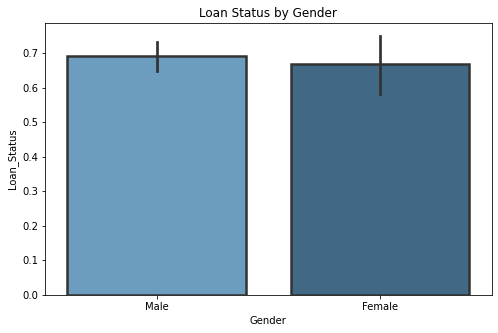

In [16]:
#Visualization of bar plot of Loan Status by Gender
plt.figure(figsize=(8,5))
sns.barplot(x="Gender", y="Loan_Status", data=data,palette="Blues_d",errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by Gender')

#print percentages of females vs. males who got loans.
print("Percentage of Loan Status approved for females:", data["Loan_Status"][data["Gender"] == 'Female'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for males:", data["Loan_Status"][data["Gender"] == 'Male'].value_counts(normalize = True)[1]*100)
print('--------------------------------------------------------------------------------------------------------------------')
print("Percentage of Loan Status rejected for males:", data["Loan_Status"][data["Gender"] == 'Male'].value_counts(normalize = True)[0]*100)
print("Percentage of Loan Status rejected for females:", data["Loan_Status"][data["Gender"] == 'Female'].value_counts(normalize = True)[0]*100)

Percentage of Loan Status approved for Married applicants: 71.82044887780549
Percentage of Loan Status approved for Single applicants: 62.91079812206573


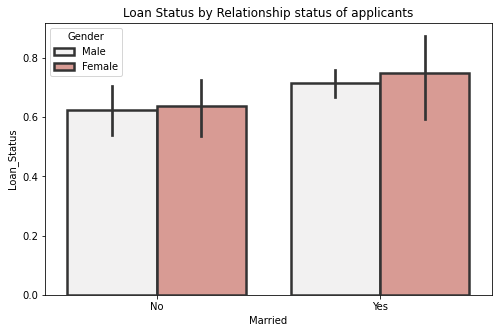

In [17]:
#Visualization of bar plot of Loan Status by relationship status.
plt.figure(figsize=(8,5))
sns.barplot(x="Married", y="Loan_Status", data=data,hue='Gender',color="salmon", saturation=.5,errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by Relationship status of applicants')

#print percentages of Loan Status approved
print("Percentage of Loan Status approved for Married applicants:", data["Loan_Status"][data["Married"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for Single applicants:", data["Loan_Status"][data["Married"] == 'No'].value_counts(normalize = True)[1]*100)

Percentage of Loan Status approved for applicants having 0 dependents: 68.61111111111111
Percentage of Loan Status approved for applicants having 1 dependents: 64.70588235294117
Percentage of Loan Status approved for applicants having 2 dependents: 75.24752475247524
Percentage of Loan Status approved for applicants having 3+ dependents: 64.70588235294117


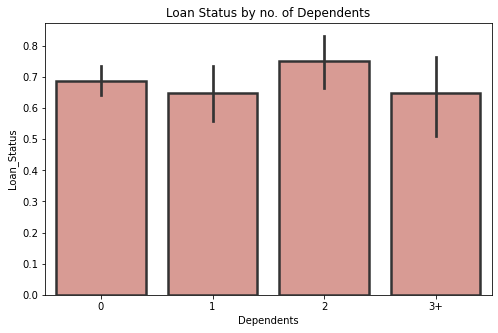

In [18]:
#Visualization of bar plot of Loan Status by no. of Dependents.
plt.figure(figsize=(8,5))
sns.barplot(x="Dependents",y="Loan_Status",data=data,color="salmon",saturation=.5,errcolor=".2",edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by no. of Dependents')

#print percentages of Loan Status approved for applicants 
print("Percentage of Loan Status approved for applicants having 0 dependents:", data["Loan_Status"][data["Dependents"] == '0'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants having 1 dependents:", data["Loan_Status"][data["Dependents"] == '1'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants having 2 dependents:", data["Loan_Status"][data["Dependents"] == '2'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants having 3+ dependents:", data["Loan_Status"][data["Dependents"] == '3+'].value_counts(normalize = True)[1]*100)

Percentage of Loan Status approved for applicants having 0 dependents: 61.19402985074627
Percentage of Loan Status approved for applicants having 1 dependents: 70.83333333333334
--------------------------------------------------------------------------------------------------------------------
Percentage of Loan Status rejected for applicants having 0 dependents: 38.80597014925373
Percentage of Loan Status rejected for applicants having 1 dependents: 29.166666666666668


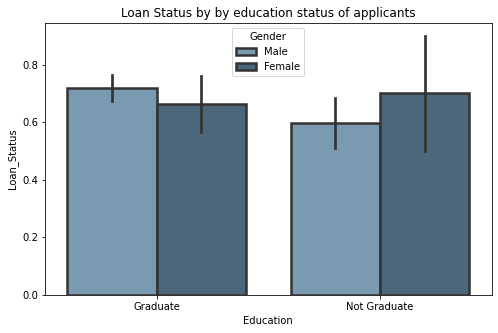

In [19]:
#Visualization of bar plot of Loan Status by education status of applicants.
plt.figure(figsize=(8,5))
sns.barplot(x="Education",y="Loan_Status",hue='Gender',data=data,palette="Blues_d",saturation=.5,errcolor=".2",edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by by education status of applicants')

#print percentages of Loan Status approved
print("Percentage of Loan Status approved for applicants having 0 dependents:", data["Loan_Status"][data["Education"] == 'Not Graduate'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants having 1 dependents:", data["Loan_Status"][data["Education"] == 'Graduate'].value_counts(normalize = True)[1]*100)
print("--------------------------------------------------------------------------------------------------------------------")
print("Percentage of Loan Status rejected for applicants having 0 dependents:", data["Loan_Status"][data["Education"] == 'Not Graduate'].value_counts(normalize = True)[0]*100)
print("Percentage of Loan Status rejected for applicants having 1 dependents:", data["Loan_Status"][data["Education"] == 'Graduate'].value_counts(normalize = True)[0]*100)

Percentage of Loan Status approved for applicants who are self employed: 68.29268292682927
Percentage of Loan Status approved for applicants who are not self employed: 68.796992481203


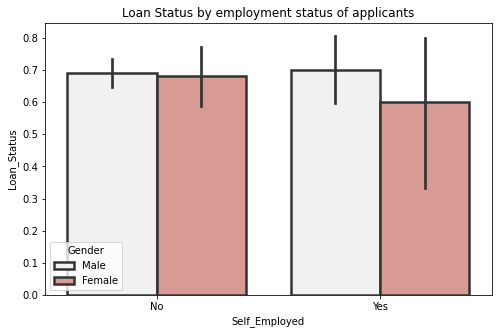

In [20]:
#Visualization of bar plot of Loan Status by employment status of applicants.
plt.figure(figsize=(8,5))
sns.barplot(x="Self_Employed",y="Loan_Status",hue='Gender',data=data,color="salmon",saturation=.5,errcolor=".2",edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by employment status of applicants')

#print percentages of Loan Status approved for applicants
print("Percentage of Loan Status approved for applicants who are self employed:", data["Loan_Status"][data["Self_Employed"] == 'Yes'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants who are not self employed:", data["Loan_Status"][data["Self_Employed"] == 'No'].value_counts(normalize = True)[1]*100)


Percentage of Loan Status approved for applicants who have property_area in Semiurban region: 76.82403433476395
Percentage of Loan Status approved for applicants who property_area in Urban region: 65.84158415841584
Percentage of Loan Status approved for applicants who property_area in Rural region: 61.452513966480446


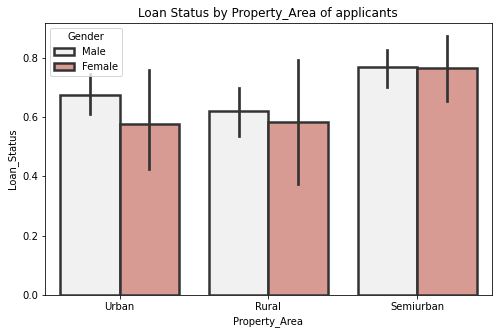

In [21]:
#Visualization of bar plot of Loan Status by Property_Area of applicants.
plt.figure(figsize=(8,5))
sns.barplot(x="Property_Area",y="Loan_Status",hue='Gender',data=data,color="salmon",saturation=.5,errcolor=".2",edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by Property_Area of applicants')

#print percentages of Loan Status approved for applicants
print("Percentage of Loan Status approved for applicants who have property_area in Semiurban region:", data["Loan_Status"][data["Property_Area"] == 'Semiurban'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants who property_area in Urban region:", data["Loan_Status"][data["Property_Area"] == 'Urban'].value_counts(normalize = True)[1]*100)
print("Percentage of Loan Status approved for applicants who property_area in Rural region:", data["Loan_Status"][data["Property_Area"] == 'Rural'].value_counts(normalize = True)[1]*100)

Text(0.5, 1.0, 'Loan Status by credit history of applicants')

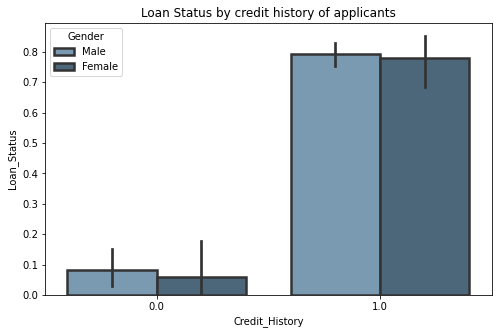

In [22]:
#Visualization of bar plot of Loan Status by credit history of applicants.
plt.figure(figsize=(8,5))
sns.barplot(x="Credit_History",y="Loan_Status",hue='Gender',data=data,palette="Blues_d",saturation=.5,errcolor=".2",edgecolor=".2",linewidth=2.5)
plt.title('Loan Status by credit history of applicants')


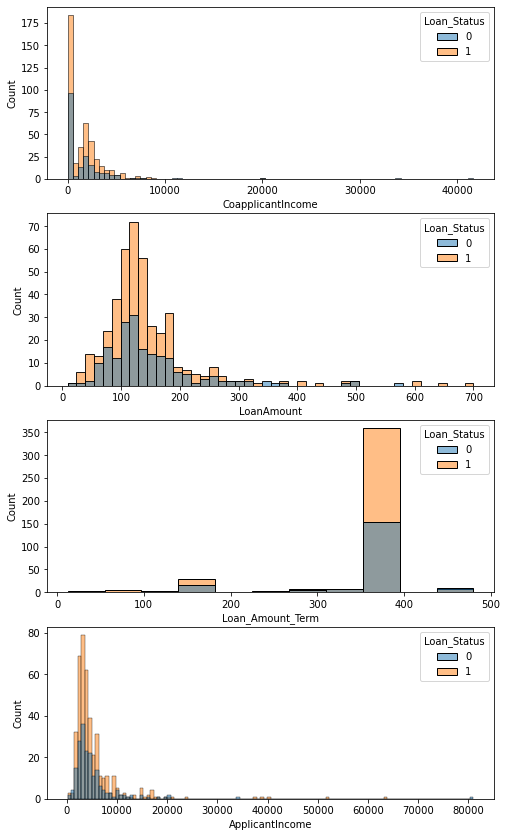

In [23]:
plt.figure(figsize=(8,8))


plt.subplot(411)
sns.histplot(x='CoapplicantIncome',data=data,hue='Loan_Status')


plt.subplot(412)
sns.histplot(x='LoanAmount',data=data,hue='Loan_Status')


plt.subplot(413)
sns.histplot(x='Loan_Amount_Term',data=data,hue='Loan_Status')

plt.subplot(414)
sns.histplot(x='ApplicantIncome',data=data,hue='Loan_Status')

plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 1.5)
plt.show()


In [24]:
#Encoding of DataFrame

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [25]:
print('Data types of dataset after applying ordinal encoding ---->\n')
data.dtypes

Data types of dataset after applying ordinal encoding ---->



Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

In [26]:
# Checking for Correlation 
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.073567,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100863,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.039235,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.039235,1.000000,0.000432,-0.077620,-0.020974


<AxesSubplot:>

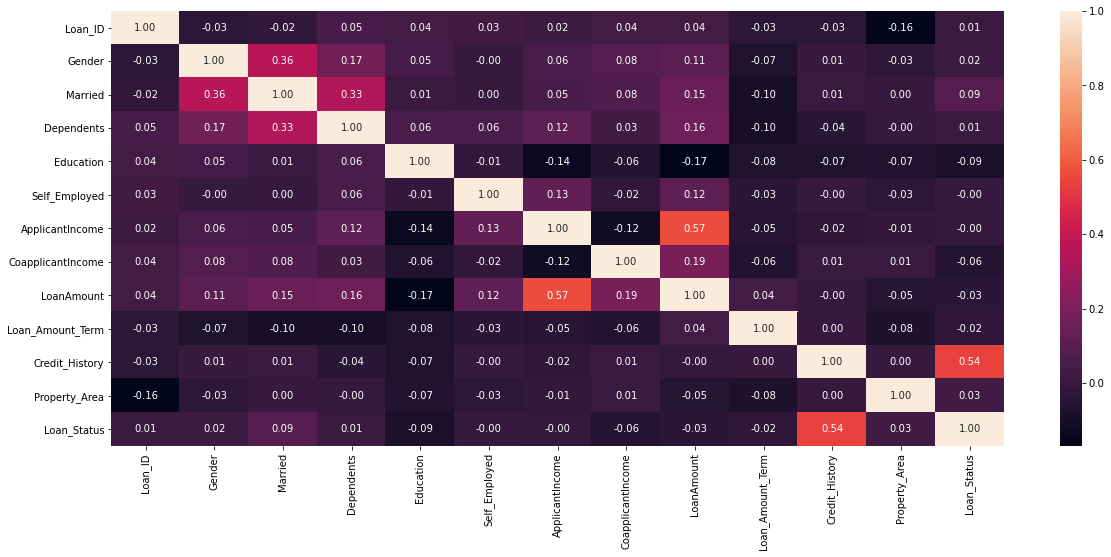

In [27]:
#Visulaization of Correlation
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),linecolor='white',annot=True,fmt='0.2f')

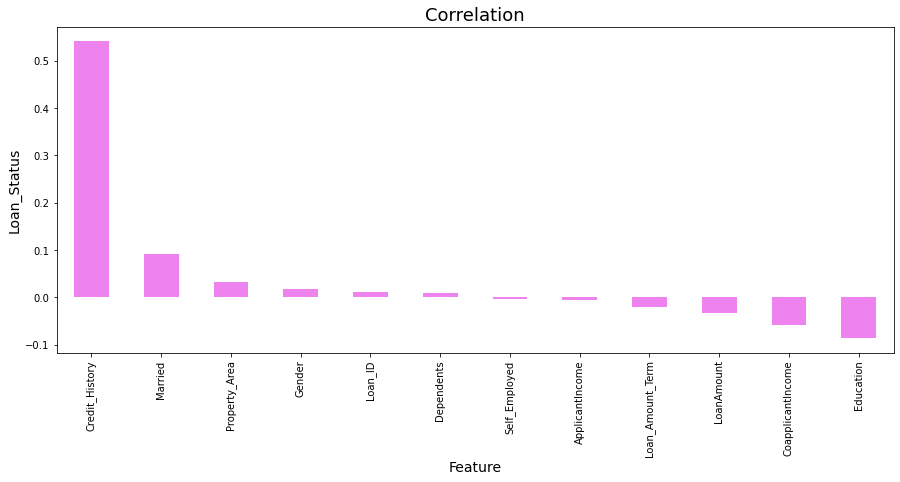

In [28]:
#Visualization of correlation of target variable with other variables
plt.figure(figsize=(15,6))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='violet')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

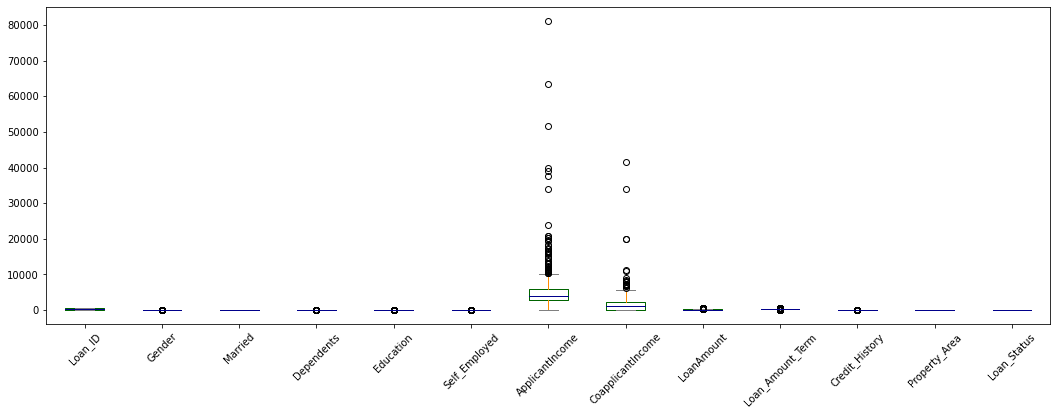

In [29]:
#Checking for Outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [30]:
### Data Cleaning 

## Removing outliers

#Importing zscore from scipy.stats

from scipy.stats import zscore

z=np.abs(zscore(data))

new_data=data[(z<3).all(axis=1)] # Threshold value is +/-3

print('Shape of new data set after removing outliers:',data.shape)
print('Shape of data set with outliers:',new_data.shape)

Shape of new data set after removing outliers: (614, 13)
Shape of data set with outliers: (577, 13)


In [31]:
##Calculating data loss

D_t=((614-577)/614)*100
print('Data loss after removing outliers is :',D_t,'%')

Data loss after removing outliers is : 6.026058631921824 %


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

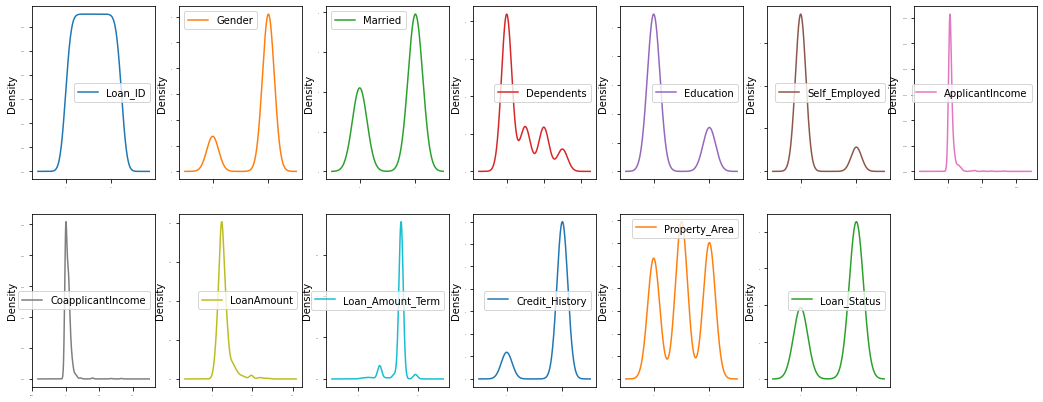

In [32]:
# Density visualisation for all attributes

data.plot(kind='density',layout=(2,7),sharex=False,sharey=False,subplots=True,grid=False,fontsize=1,figsize=(18,7))

In [33]:
new_data.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [34]:
## Except for loan_id and property area rest all the attributes has skewness.

# But we donot remove skewness for catagorical attributes.

## Removing skewness for numerical data.

skew_data=('ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term')

for data in skew_data:
    new_data[data]=np.log1p(new_data[data])

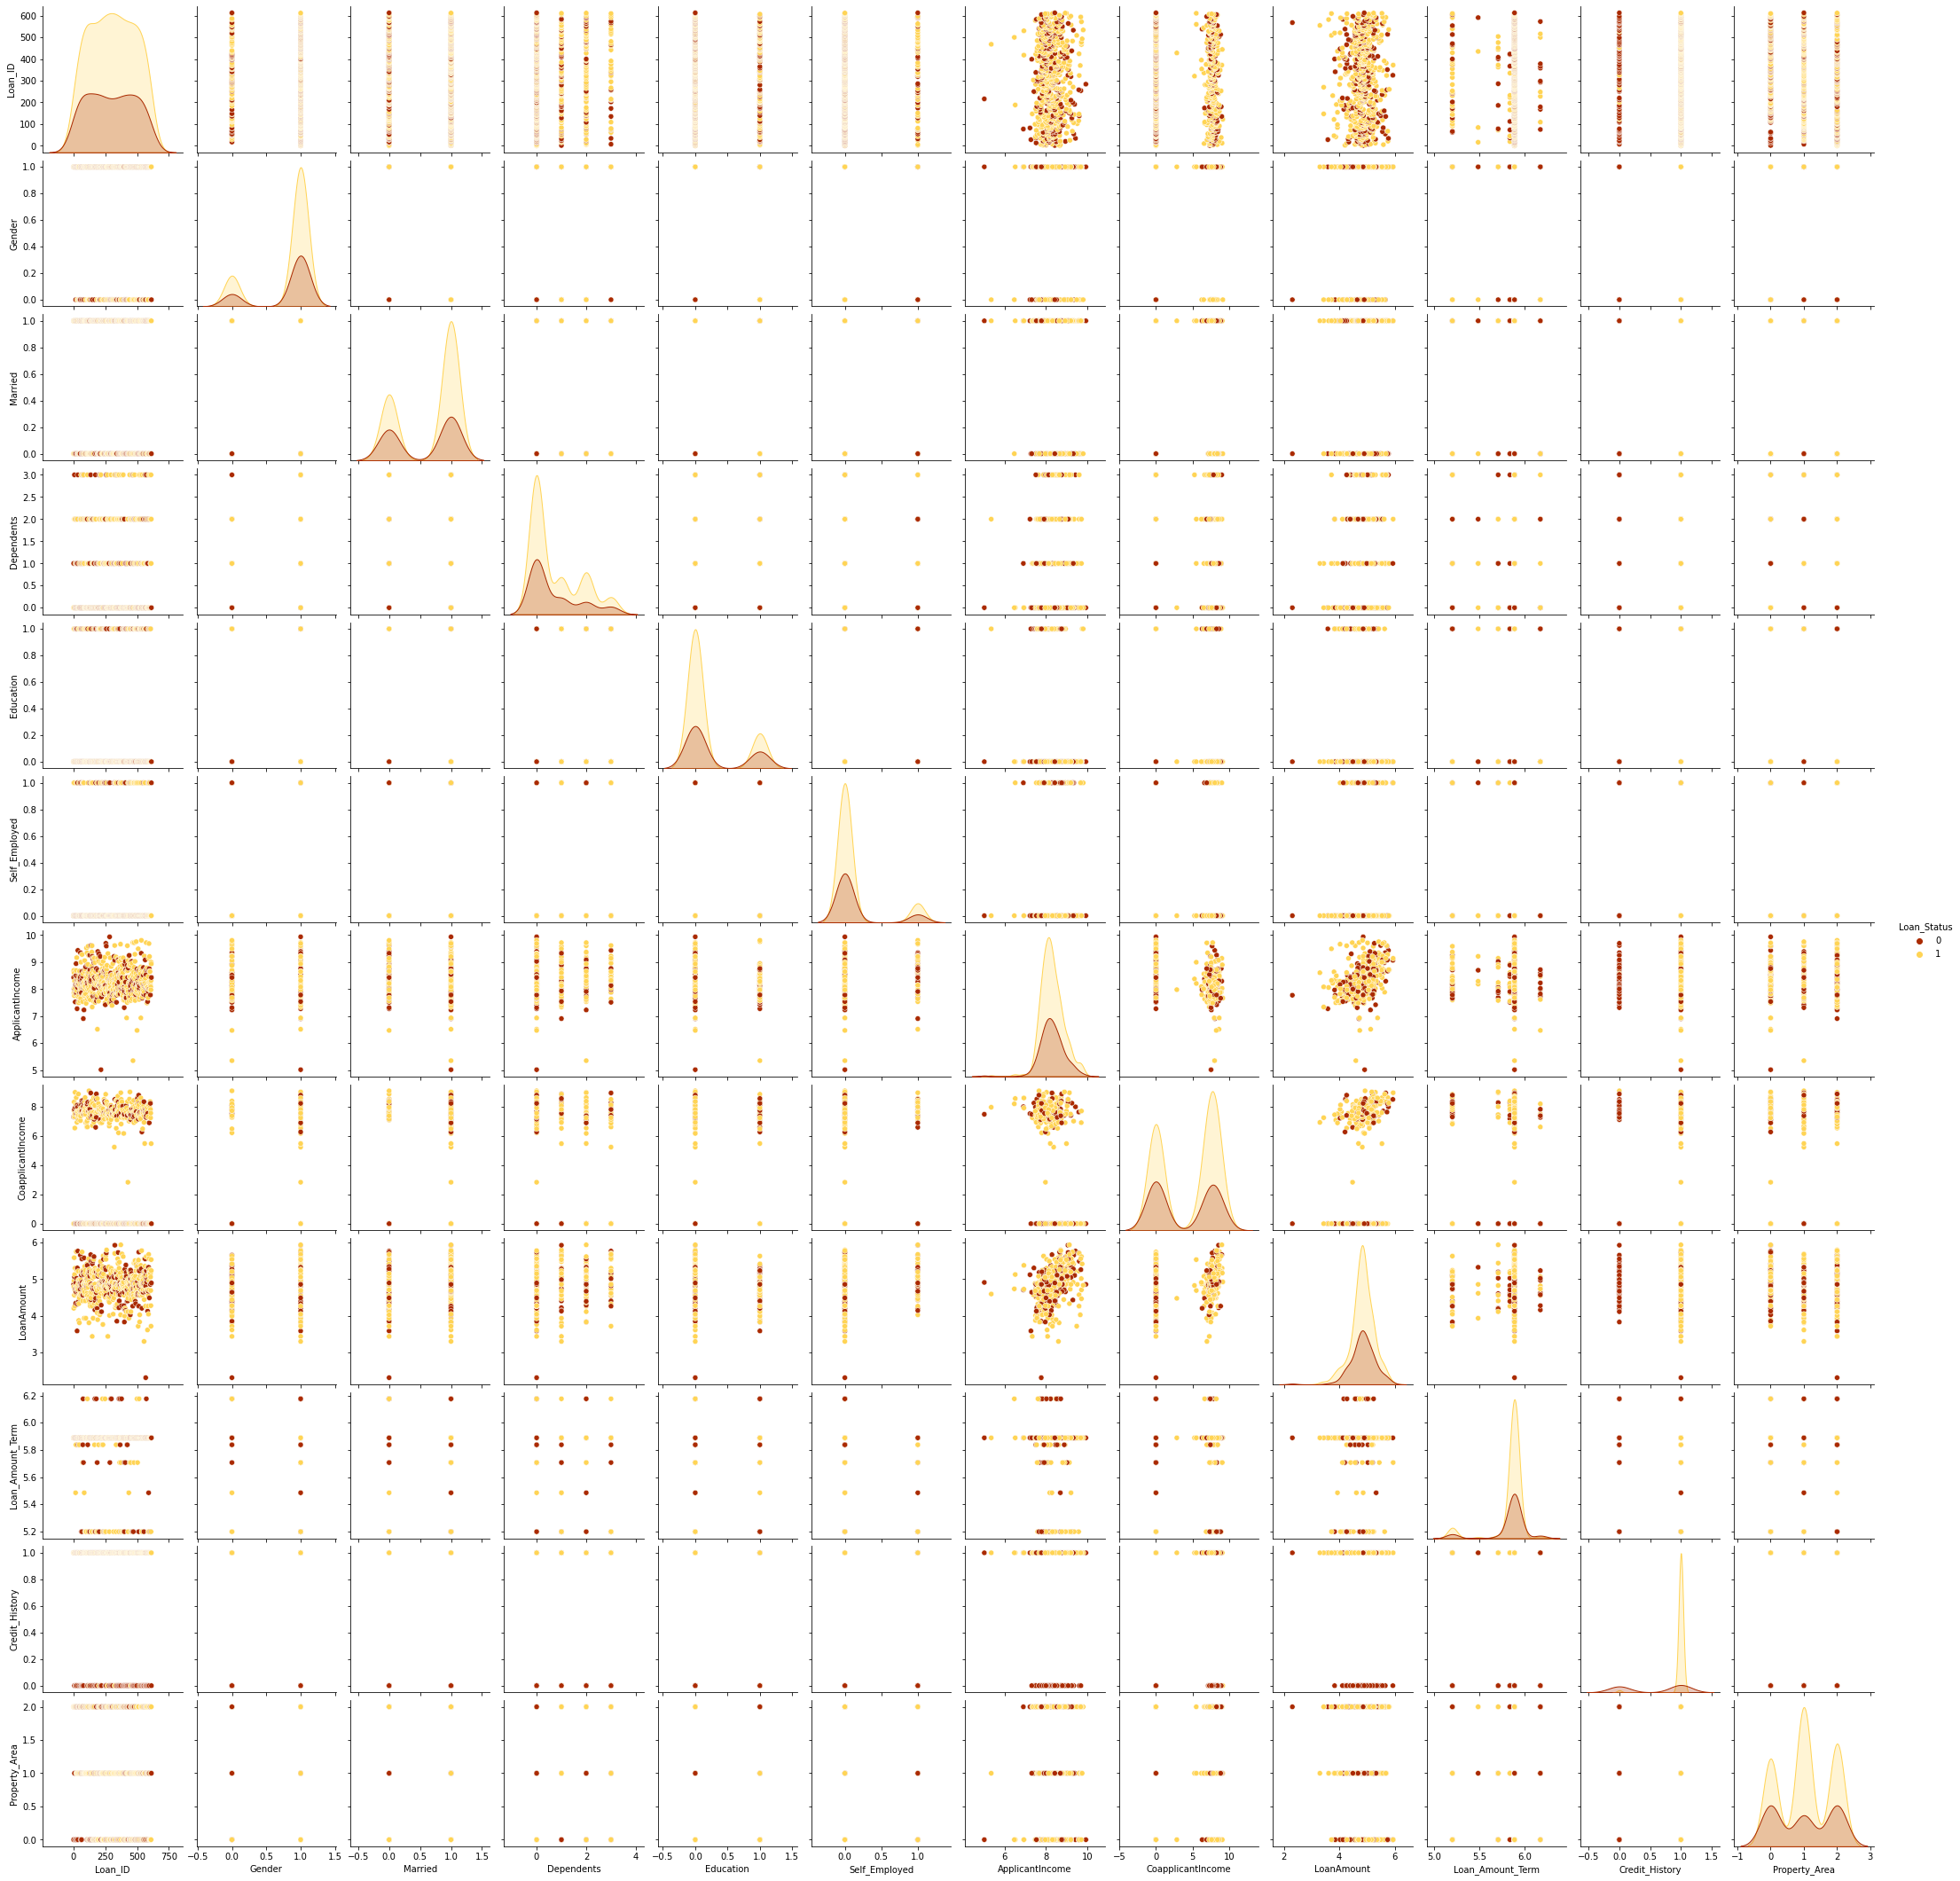

In [35]:
sns.pairplot(new_data,hue='Loan_Status',palette='afmhot')

In [36]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.859812,5.888878,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,5.888878,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,5.888878,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,5.888878,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,5.888878,1.0,2.0,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

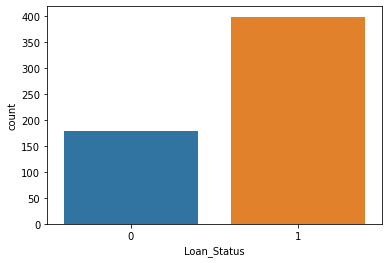

In [37]:
sns.countplot(x='Loan_Status',data=new_data)

In [38]:
#Splitting the data inrto train and test

x=new_data.drop(['Loan_ID','Loan_Status'],axis=1)
y=new_data['Loan_Status']

In [39]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [40]:
print('Shape of x_over:',x_over.shape)
print('Shape of y_over:',y_over.shape)

Shape of x_over: (796, 11)
Shape of y_over: (796,)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [42]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    dtc_Accu=accuracy_score(y_test,pred_test)
    if dtc_Accu>maxAccu:
        maxAccu=dtc_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

Best Accuracy is :  83.26359832635984 on random state : 78


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=78)

In [45]:
models = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Extratrees :',ExtraTreesClassifier()],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)],
               ['SVM :', SVC()],
               ['NB :' , GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['Xgboost: ', XGBClassifier()]]

In [46]:
print("Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (accuracy_score(y_test, predictions))*100)

Accuracy Score----->


DecisionTree : 81.58995815899581
RandomForest : 86.61087866108787
Extratrees : 85.77405857740585
KNeighbours : 76.15062761506276
SVM : 76.98744769874477
NB : 78.24267782426779
AdaBoostClassifier : 77.40585774058577
GradientBoostingClassifier:  83.26359832635984
[17:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  83.26359832635984


In [47]:
print("f1_score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (f1_score(y_test, predictions))*100)

f1_score----->


DecisionTree : 82.53968253968254
RandomForest : 87.8228782287823
Extratrees : 87.64044943820224
KNeighbours : 73.23943661971832
SVM : 81.4814814814815
NB : 83.11688311688312
AdaBoostClassifier : 79.23076923076924
GradientBoostingClassifier:  85.28301886792453
[17:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  84.37500000000001


In [48]:
print("Confusion Matrix----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name,'\n', (confusion_matrix(y_test, predictions))*100)

Confusion Matrix----->


DecisionTree : 
 [[ 9100  1900]
 [ 1900 11000]]
RandomForest : 
 [[ 8800  2200]
 [ 1200 11700]]
Extratrees : 
 [[ 9000  2000]
 [ 1400 11500]]
KNeighbours : 
 [[10400   600]
 [ 5100  7800]]
SVM : 
 [[ 6300  4700]
 [  800 12100]]
NB : 
 [[ 5900  5100]
 [  100 12800]]
AdaBoostClassifier : 
 [[ 8200  2800]
 [ 2600 10300]]
GradientBoostingClassifier:  
 [[ 8700  2300]
 [ 1600 11300]]
[17:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  
 [[ 9100  1900]
 [ 2100 10800]]


In [49]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x_over,y_over,cv=5)
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean()*100,result.std())
    print(result)

Cross_val_scores:


DecisionTree : : 78.778302 (0.059523)
RandomForest : : 83.302673 (0.071481)
Extratrees : : 83.929245 (0.056208)
KNeighbours : : 76.631289 (0.016352)
SVM : : 72.240566 (0.019335)
NB : : 73.498428 (0.026979)
AdaBoostClassifier : : 77.647799 (0.055248)
GradientBoostingClassifier:  : 81.922170 (0.081215)
[17:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:55] WARNING: C:/Users/Administrator/workspace/xgboo

In [50]:
#ExtraTrees 
##importing library
from sklearn.model_selection import GridSearchCV

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#Create new GBC object
ETC_2 = ExtraTreesClassifier()

#Use GridSearch
GCV = GridSearchCV(ETC_2, ex_param_grid, cv=5, scoring='accuracy')

#Fit the model
best_model = GCV.fit(x_over,y_over)

#checking for best parameters
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [51]:
#Creating Final Model after hyperparameter tuning for ExtraTreesClassifier

f_mod_ETC= ExtraTreesClassifier(max_depth=None,max_features=1,min_samples_split=10,
                                min_samples_leaf=1,n_estimators=300,criterion='gini')
f_mod_ETC.fit(x_train, y_train)

y_pred = f_mod_ETC.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for ExtraTreesClassifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_ETC, x_over, y_over, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

classification_report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       110
           1       0.85      0.91      0.88       129

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[ 90  20]
 [ 12 117]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for ExtraTreesClassifier is : 0.8661087866108786
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Model accuracy:  83.0503144654088


### After hyper parameter tuning, model accuracy with high performance is 83.05%

AUC-ROC score of LogisticRegression: 0.8625792811839322
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


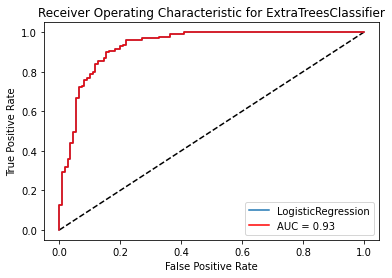

In [52]:
## Checking fro AUC-ROC Score

y_prob=f_mod_ETC.predict_proba(x_test)[:,1] 
pred=f_mod_ETC.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of LogisticRegression:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for ExtraTreesClassifier')
plt.show()

### AUC score of model is 93%.

In [53]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_ETC,'loan_status_etc.obj')

['loan_status_etc.obj']